In [7]:
from keras.layers import Input,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os

In [8]:
IMAGE_SIZE = [224,224]

In [9]:
family = 'C:\\Users\\SHREYA\\.keras\\datasets\\Family'

In [10]:
family

'C:\\Users\\SHREYA\\.keras\\datasets\\Family'

In [11]:
os.listdir(family)

['test', 'train']

In [17]:
os.listdir('C:\\Users\\SHREYA\\.keras\\datasets\\Family\\test')

['aahan', 'shreya', 'viplav']

In [18]:
train_path = 'C:\\Users\\SHREYA\\.keras\\datasets\\Family\\train'
test_path = 'C:\\Users\\SHREYA\\.keras\\datasets\\Family\\test'

In [19]:
train_path

'C:\\Users\\SHREYA\\.keras\\datasets\\Family\\train'

In [20]:
test_path

'C:\\Users\\SHREYA\\.keras\\datasets\\Family\\test'

In [23]:
vgg = VGG16(input_shape = IMAGE_SIZE +[3], weights='imagenet',include_top=False)

58889256/58889256 [==============================] - 10s 0us/step


In [24]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [25]:
for layer in vgg.layers:
    layer.trainable = False

In [26]:
x = Flatten()(vgg.output)
prediction = Dense(3,activation='softmax')(x)

In [27]:
model = Model(inputs=vgg.input,outputs=prediction)

In [28]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [29]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [32]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [47]:
training_set = train_datagen.flow_from_directory(train_path,
                                                batch_size=2,
                                                target_size=(224,224),
                                                class_mode='sparse')

Found 105 images belonging to 3 classes.


In [50]:
test_set = test_datagen.flow_from_directory(test_path,
                                           target_size=(224,224),
                                           batch_size=2,
                                           class_mode='sparse')

Found 45 images belonging to 3 classes.


In [51]:
training_set.class_indices

{'aahan': 0, 'shreya': 1, 'viplav': 2}

In [52]:
test_set.class_indices

{'aahan': 0, 'shreya': 1, 'viplav': 2}

In [53]:
history = model.fit(training_set,
                             validation_data=test_set,
                             epochs=25)

Epoch 1/25
53/53 [==============================] - 95s 2s/step - loss: 1.1869 - accuracy: 0.6286 - val_loss: 0.2477 - val_accuracy: 0.9111
Epoch 2/25
53/53 [==============================] - 106s 2s/step - loss: 0.3107 - accuracy: 0.8952 - val_loss: 0.6093 - val_accuracy: 0.7778
Epoch 3/25
53/53 [==============================] - 99s 2s/step - loss: 0.0461 - accuracy: 0.9905 - val_loss: 0.5632 - val_accuracy: 0.7556
Epoch 4/25
53/53 [==============================] - 97s 2s/step - loss: 0.0206 - accuracy: 1.0000 - val_loss: 0.2760 - val_accuracy: 0.8889
Epoch 5/25
53/53 [==============================] - 98s 2s/step - loss: 0.2911 - accuracy: 0.9238 - val_loss: 0.0720 - val_accuracy: 0.9778
Epoch 6/25
53/53 [==============================] - 99s 2s/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.0852 - val_accuracy: 0.9778
Epoch 7/25
53/53 [==============================] - 104s 2s/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.1234 - val_accuracy: 0.9111
Epoch 8/25
53/53 [

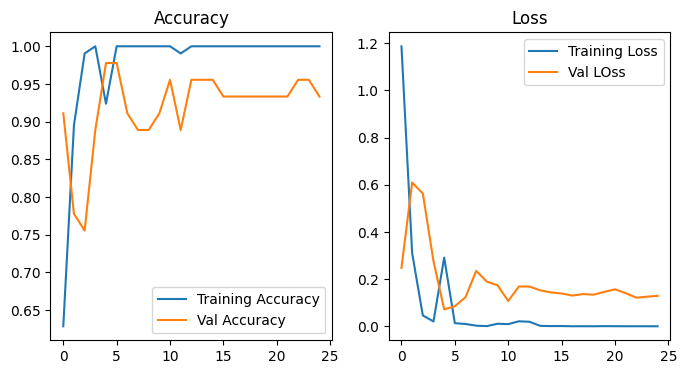

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [58]:
os.listdir('C:\\Users\\SHREYA\\.keras\\datasets\\Family\\test\\viplav')

['IMG20221005225056.jpg',
 'IMG20221016233936.jpg',
 'IMG20221025155105.jpg',
 'IMG20221025165714.jpg',
 'IMG20221025165734.jpg',
 'IMG20221129230832.jpg',
 'IMG20221129231138.jpg',
 'IMG20221129231147.jpg',
 'IMG20221129233202.jpg',
 'IMG20221129233212.jpg',
 'IMG20221211125624.jpg',
 'IMG20230211153717.jpg',
 'IMG20230218091629.jpg',
 'IMG20230311214248.jpg',
 'IMG_20221009_003837.jpg']

In [62]:
from tensorflow.keras.utils import img_to_array, array_to_img,load_img

In [65]:
data1 = load_img("C:\\Users\\SHREYA\\.keras\\datasets\\Family\\test\\viplav\\IMG20221129231147.jpg",target_size=(224,224))

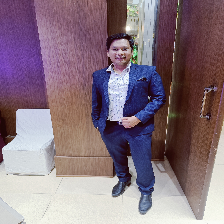

In [66]:
data1

In [67]:
test = img_to_array(data1)

In [68]:
test.shape

(224, 224, 3)

In [70]:
test_array = test.reshape(1,224,224,3)

In [71]:
test_array.shape

(1, 224, 224, 3)

In [72]:
model.predict(test_array)

1/1 [==============================] - 3s 3s/step


array([[0., 0., 1.]], dtype=float32)

In [73]:
os.listdir('C:\\Users\\SHREYA\\.keras\\datasets\\Family\\test\\aahan')

['DSC00924.JPG',
 'DSC00929.JPG',
 'DSC00930.JPG',
 'DSC00931.JPG',
 'DSC00932.JPG',
 'DSC00934.JPG',
 'DSC00935.JPG',
 'DSC00936.JPG',
 'DSC00937.JPG',
 'DSC00940.JPG',
 'DSC00941.JPG',
 'DSC00942.JPG',
 'DSC00944.JPG',
 'DSC00948.JPG',
 'DSC00949.JPG']

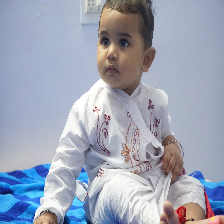

In [74]:
data2 = load_img('C:\\Users\\SHREYA\\.keras\\datasets\\Family\\test\\aahan\\DSC00940.JPG',target_size=(224,224))
data2

In [75]:
test1 = img_to_array(data2)

In [76]:
test1.shape

(224, 224, 3)

In [78]:
test_array1 = test1.reshape(1,224,224,3)

In [79]:
test_array1.shape

(1, 224, 224, 3)

In [80]:
model.predict(test_array1)

1/1 [==============================] - 1s 979ms/step


array([[1., 0., 0.]], dtype=float32)

In [81]:
os.listdir('C:\\Users\\SHREYA\\.keras\\datasets\\Family\\test\\shreya')

['IMG_8013.jpg',
 'IMG_8167.jpg',
 'IMG_8185.jpg',
 'IMG_8343.jpg',
 'IMG_8768.jpg',
 'IMG_8911.jpg',
 'IMG_8912.jpg',
 'IMG_8953.jpg',
 'IMG_9280.jpg',
 'IMG_9282.jpg',
 'IMG_9284.jpg',
 'IMG_9288.jpg',
 'IMG_9292.jpg',
 'KIS_8778.JPG',
 'KIS_9109.JPG']

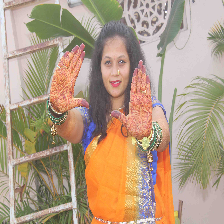

In [107]:
data3 = load_img('C:\\Users\\SHREYA\\.keras\\datasets\\Family\\test\\shreya\\IMG_8167.jpg',target_size=(224,224))
data3

In [108]:
test2 = img_to_array(data3)

In [109]:
test2.shape

(224, 224, 3)

In [110]:
test_array2 = test2.reshape(1,224,224,3)

In [111]:
test_array2.shape

(1, 224, 224, 3)

In [112]:
model.predict(test_array2)

1/1 [==============================] - 1s 682ms/step


array([[0., 1., 0.]], dtype=float32)